In [1]:
%pip install numpy 
%pip install matplotlib 
%pip install scikit-learn 
%pip install torch 

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


# Importações

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# Parâmetros

In [4]:
n_samples = 100
x = np.random.uniform(-10, 10, n_samples)
epsilon = np.random.normal(0, 2, n_samples)
y = 3 * x + 5 + epsilon


# Visualização dos dados

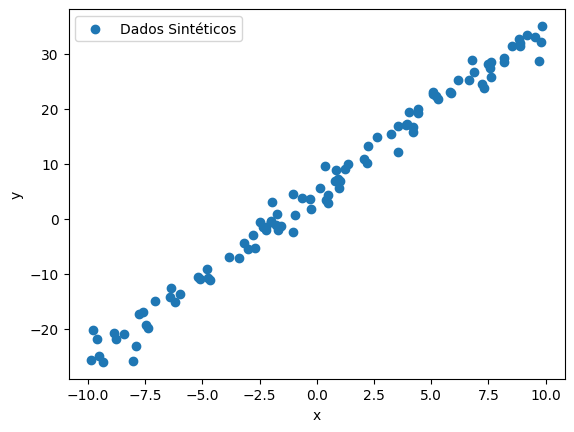

In [5]:
plt.scatter(x, y, label='Dados Sintéticos')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Dividir os dados em treino e teste

In [6]:
test_size = 0.2
random_state = 42
x_train, x_test, y_train, y_test = train_test_split(
    x, y, 
    test_size=test_size,
    random_state=random_state
)

# Visualização dos dados de treino e teste

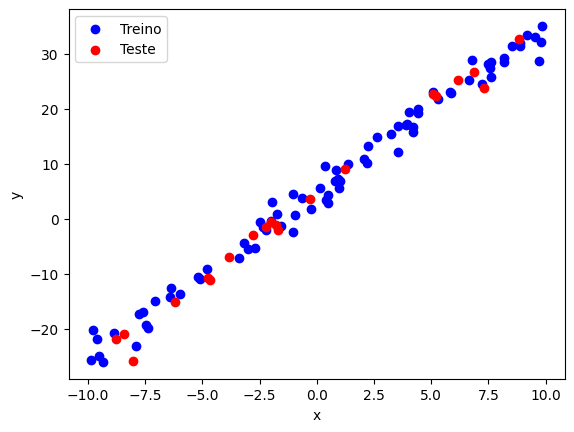

In [7]:
plt.scatter(x_train, y_train, label='Treino', color='blue')
plt.scatter(x_test, y_test, label='Teste', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Implementação dos modelos de regressão linear

## Solução de mínimos quadrados (pseudo-inversa)

Adicionando uma coluna de uns para o termo de bias

In [8]:
X_train = np.vstack([x_train, np.ones(len(x_train))]).T
X_test = np.vstack([x_test, np.ones(len(x_test))]).T

Calculando a pseudo-inversa

In [9]:
theta = np.linalg.pinv(X_train) @ y_train

Fazendo previsões

In [10]:
y_pred_ls = X_test @ theta

Visualização dos resultados

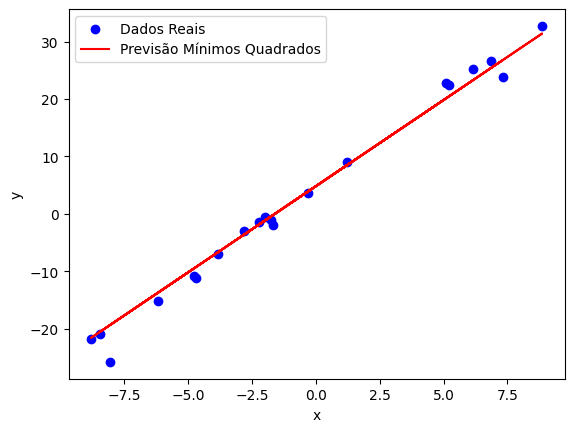

In [11]:
plt.scatter(x_test, y_test, label='Dados Reais', color='blue')
plt.plot(x_test, y_pred_ls, label='Previsão Mínimos Quadrados', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## Rede neural com uma camada treinada via gradiente descendente

Convertendo os dados para tensores do PyTorch

In [12]:
x_train_tensor = torch.tensor(x_train, dtype=torch.float32).view(-1, 1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

Definindo o modelo

In [13]:
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)

    def forward(self, x):
        return self.linear(x)

model = LinearRegression()

Definindo a função de perda e o otimizador

In [14]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

Treinando o modelo

In [15]:
num_epochs = 1000
model.train()
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    # Backward pass e otimização
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')


Epoch [100/1000], Loss: 4.0875
Epoch [200/1000], Loss: 3.6359
Epoch [300/1000], Loss: 3.6274
Epoch [400/1000], Loss: 3.6273
Epoch [500/1000], Loss: 3.6273
Epoch [600/1000], Loss: 3.6273
Epoch [700/1000], Loss: 3.6273
Epoch [800/1000], Loss: 3.6273
Epoch [900/1000], Loss: 3.6273
Epoch [1000/1000], Loss: 3.6273


Fazendo previsões

In [16]:
model.eval()
with torch.no_grad():
    y_pred_nn = model(x_test_tensor).numpy()

Visualização dos resultados

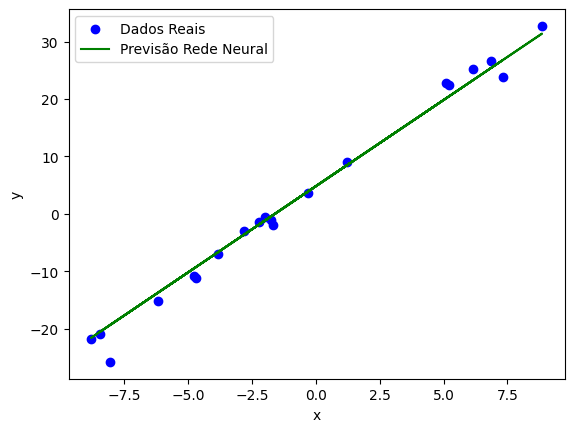

In [17]:
plt.scatter(x_test, y_test, label='Dados Reais', color='blue')
plt.plot(x_test, y_pred_nn, label='Previsão Rede Neural', color='green')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Soluções obtidas pelos dois métodos

Mínimos Quadrados

In [18]:
print(f"y = {theta[0]:.4f}x + {theta[1]:.4f}")

y = 3.0053x + 4.8052


Rede neural

In [19]:
weights = model.linear.weight.item()
bias = model.linear.bias.item()
print(f"y = {weights:.4f}x + {bias:.4f}")

y = 3.0053x + 4.8052
